### Import Library

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

### Load dataset

In [2]:
ticker = 'GC=F'
end_date = datetime.today().strftime('%Y-%m-%d')

gold_data = yf.download(ticker, start='2004-01-01', end=end_date)

goldDF = pd.DataFrame(gold_data).reset_index()

goldDF

[*********************100%%**********************]  1 of 1 completed


Date         Open         High          Low        Close  \
0    2004-01-05   415.700012   422.500000   422.500000   424.399994   
1    2004-01-06   424.399994   424.299988   424.299988   422.799988   
2    2004-01-07   423.000000   423.000000   423.000000   421.899994   
3    2004-01-08   421.899994   422.000000   422.000000   424.000000   
4    2004-01-09   424.000000   423.899994   423.899994   426.399994   
...         ...          ...          ...          ...          ...   
5033 2024-01-15  2051.699951  2054.800049  2051.699951  2054.800049   
5034 2024-01-16  2051.699951  2054.800049  2026.000000  2026.000000   
5035 2024-01-17  2026.500000  2026.500000  2002.599976  2002.599976   
5036 2024-01-18  2012.800049  2018.599976  2009.500000  2018.599976   
5037 2024-01-19  2023.199951  2036.000000  2019.500000  2026.500000   

        Adj Close  Volume  
0      424.399994      20  
1      422.799988      20  
2      421.899994      20  
3      424.000000      20  
4      426.399994      20  
...           ...     ...  
5033  2054.800049     390  
5034  2026.000000      46  
5035  2002.599976     764  
5036  2018.599976    1474  
5037  2026.500000    1474  

[5038 rows x 7 columns]

## Exploratory Data Analysis (EDA)

In [3]:
# Display data types
goldDF.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [4]:
# Display information about the DataFrame
goldDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5038 entries, 0 to 5037
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5038 non-null   datetime64[ns]
 1   Open       5038 non-null   float64       
 2   High       5038 non-null   float64       
 3   Low        5038 non-null   float64       
 4   Close      5038 non-null   float64       
 5   Adj Close  5038 non-null   float64       
 6   Volume     5038 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 275.6 KB


#### Data Cleaning

In [5]:
# Checking for missing values
missing_values = goldDF.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
# Handling missing values (if have)
goldDF = goldDF.dropna()

In [7]:
# Summary statistics
summary_stats = goldDF.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                                 Date         Open         High          Low  \
count                           5038  5038.000000  5038.000000  5038.000000   
mean   2014-01-14 13:22:01.953156096  1242.537277  1248.790294  1235.903593   
min              2004-01-05 00:00:00   375.799988   375.799988   375.799988   
25%              2009-01-13 06:00:00   921.300003   926.600006   915.225006   
50%              2014-01-14 12:00:00  1269.799988  1274.649963  1264.750000   
75%              2019-01-21 00:00:00  1629.174957  1641.125031  1619.675049   
max              2024-01-19 00:00:00  2081.600098  2130.199951  2066.500000   
std                              NaN   454.465985   456.898311   451.944020   

             Close    Adj Close         Volume  
count  5038.000000  5038.000000    5038.000000  
mean   1242.398233  1242.398233    4802.149266  
min     374.799988   374.799988       0.000000  
25%     922.225006   922.225006      30.250000  
50%    1270.400024  12

In [8]:
goldDF.std()

Date         2112 days 23:12:11.356896672
Open                           454.465985
High                           456.898311
Low                             451.94402
Close                           454.42342
Adj Close                       454.42342
Volume                       26130.262789
dtype: object

## Statistical Analysis and Hypothesis Testing

In [9]:
# Calculate mean and standard deviation difference
mean_difference = (goldDF['Adj Close'] - goldDF['Close']).mean()
std_difference = (goldDF['Adj Close'] - goldDF['Close']).std()

print(f"Mean Difference: {mean_difference:.2f} USD")
print(f"Standard Deviation of Difference: {std_difference:.2f} USD")

Mean Difference: 0.00 USD
Standard Deviation of Difference: 0.00 USD


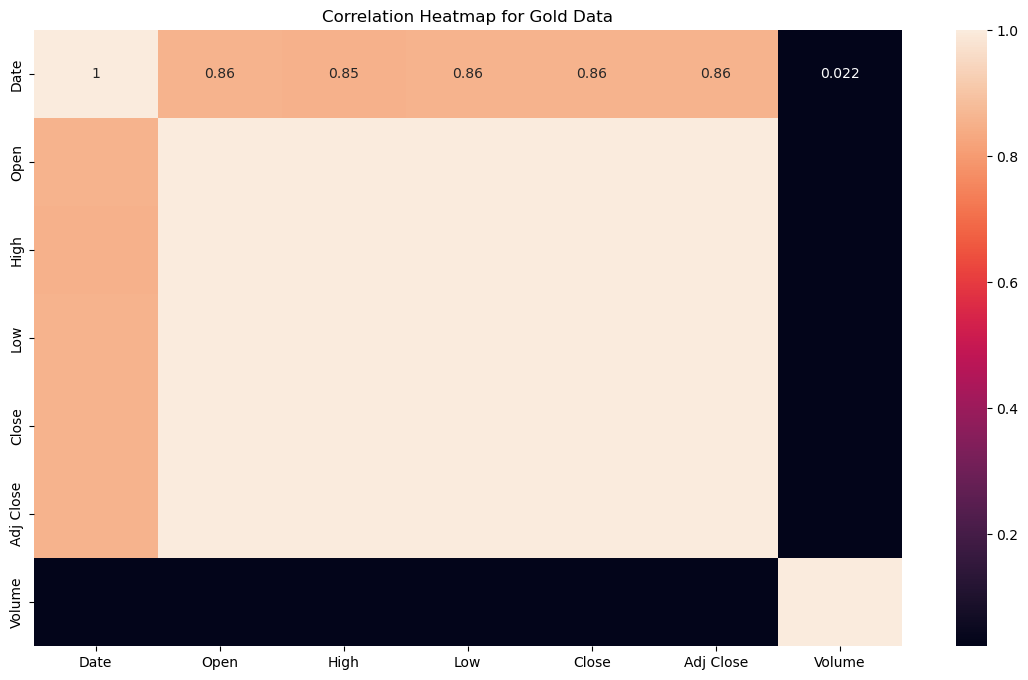

In [10]:
goldDF_corr = goldDF.corr()
goldDF_corr

plt.figure(figsize=(14, 8))
sns.heatmap(goldDF_corr, annot=True)

plt.title('Correlation Heatmap for Gold Data')
plt.show()

## Model Selection and Development

In [11]:
# Calculate moving averages
maen100Days = goldDF['Close'].rolling(100).mean()
maen200Days = goldDF['Close'].rolling(200).mean()
maen300Days = goldDF['Close'].rolling(300).mean()

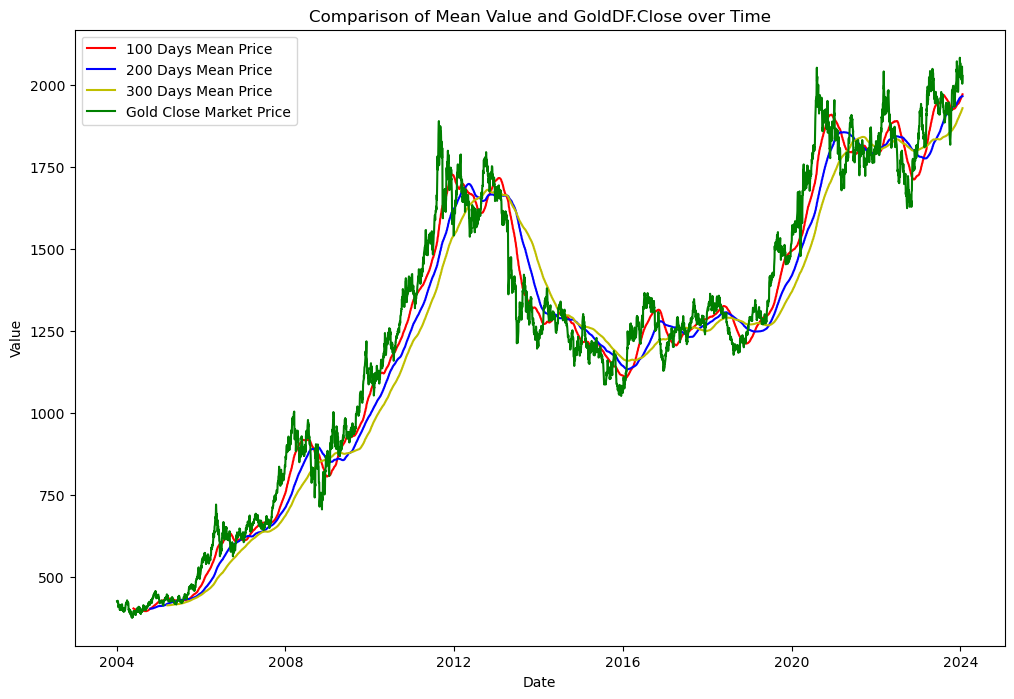

In [12]:
# Plot mean values and gold close prices over time
plt.figure(figsize=(12, 8))

plt.plot(goldDF['Date'], maen100Days, 'r', label='100 Days Mean Price')
plt.plot(goldDF['Date'], maen200Days, 'b', label='200 Days Mean Price')
plt.plot(goldDF['Date'], maen300Days, 'y', label='300 Days Mean Price')

plt.plot(goldDF['Date'], goldDF['Close'], 'g', label='Gold Close Market Price')

plt.title('Comparison of Mean Value and GoldDF.Close over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

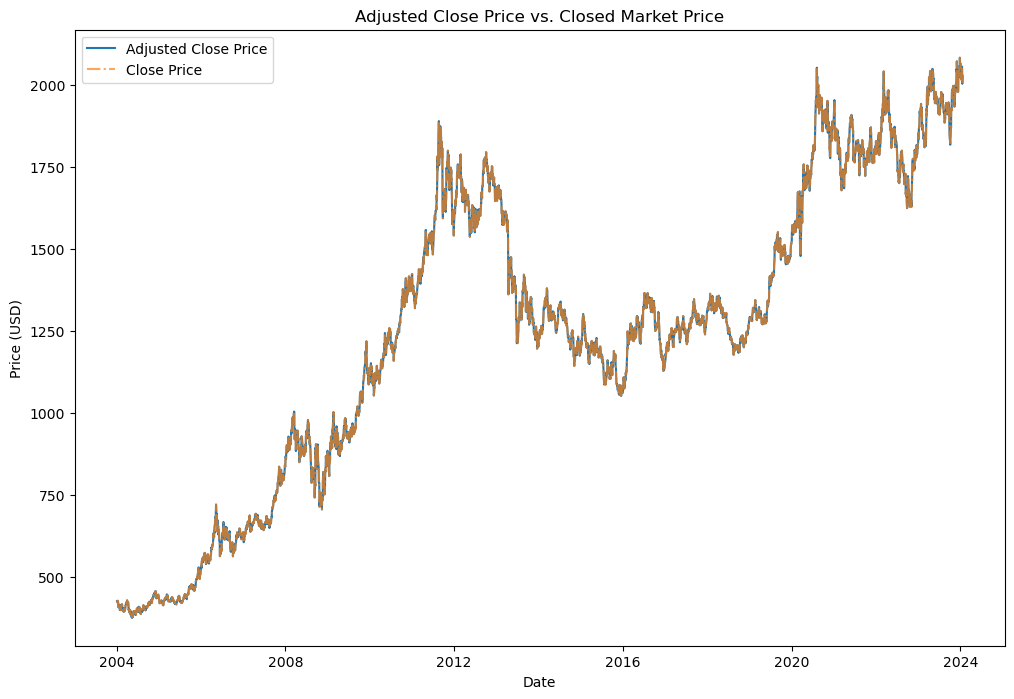

In [13]:
# Check Adj Close Price with Close Price difference
plt.figure(figsize=(12, 8))

plt.plot(goldDF['Date'], goldDF['Adj Close'], label='Adjusted Close Price', linestyle='-')
plt.plot(goldDF['Date'], goldDF['Close'], label='Close Price', linestyle='-.', alpha=0.7)

plt.legend()
plt.title('Adjusted Close Price vs. Closed Market Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.show()

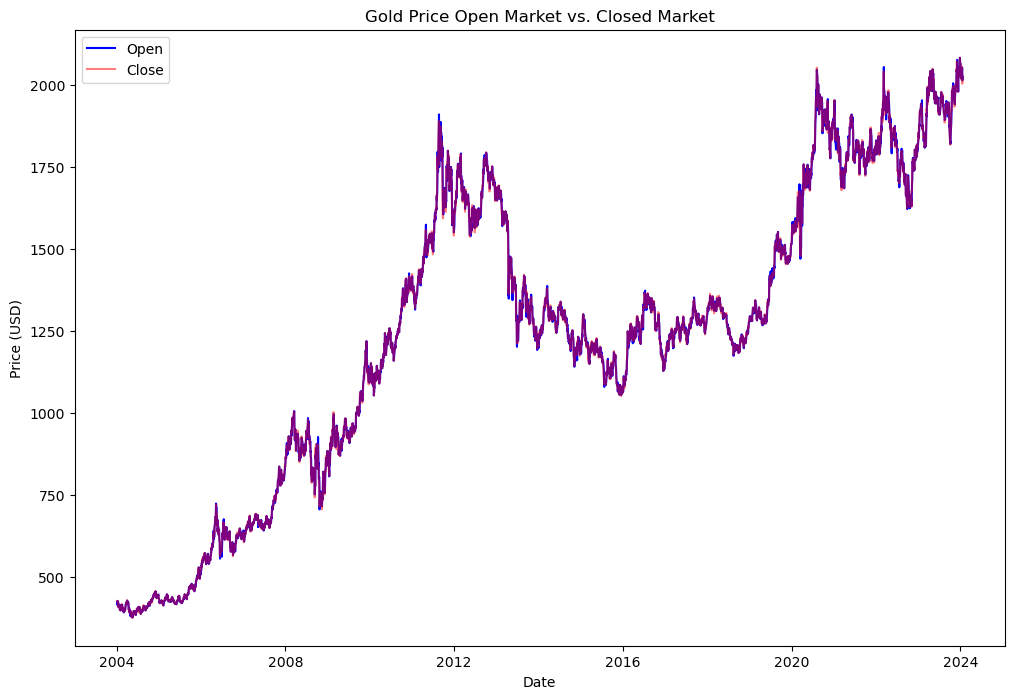

In [14]:
# Check Close Price with Open Price difference
plt.figure(figsize=(12, 8))

plt.plot(goldDF['Date'], goldDF['Open'], label='Open', linestyle='-', color='blue')
plt.plot(goldDF['Date'], goldDF['Close'], label='Close', linestyle='-', color='red', alpha=0.5)

plt.legend()
plt.title('Gold Price Open Market vs. Closed Market')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.show()

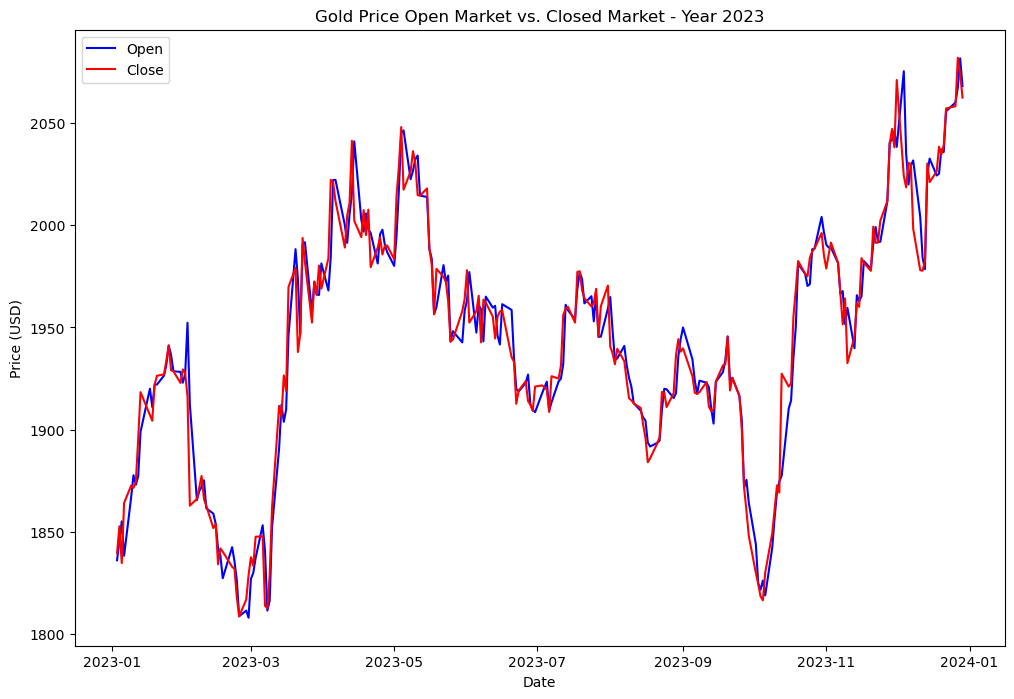

In [15]:
# Show Year 2023 plot 
year2023 = goldDF[goldDF['Date'].dt.year == 2023]

plt.figure(figsize=(12, 8))

plt.plot(year2023['Date'], year2023['Open'], label='Open', linestyle='-', color='blue')
plt.plot(year2023['Date'], year2023['Close'], label='Close', linestyle='-', color='red')

plt.legend()
plt.title('Gold Price Open Market vs. Closed Market - Year 2023')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.show()

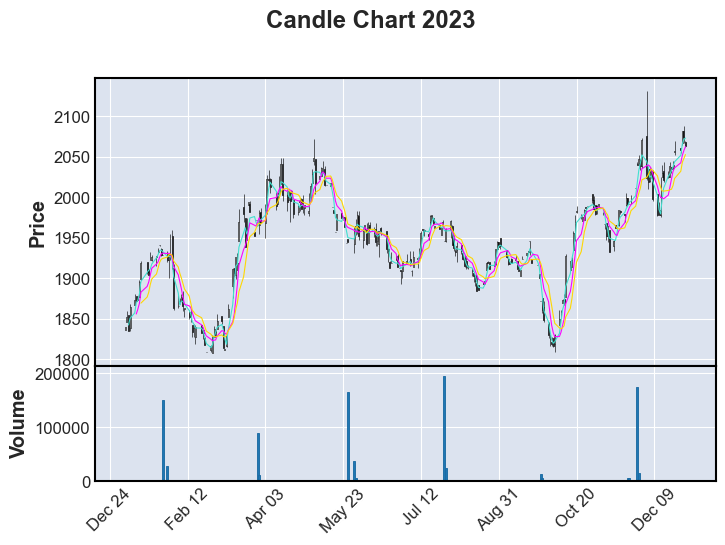

In [16]:
import mplfinance as mpf

# Show the plot use Candlen Chart
Fdf = goldDF.copy()
Fdf.set_index('Date', inplace=True)

dec_2023 = Fdf.loc['2023-01-01':'2023-12-31']

mpf.plot(dec_2023, type='candle', mav=(3, 6, 9), figratio=(12, 8), volume=True,
         title='Candle Chart 2023', show_nontrading=True)

mpf.show()

In [17]:
# Find the Top 5 volume at December 2023
goldDF['Date'] = pd.to_datetime(goldDF['Date'])

dec_2023_data = goldDF[(goldDF['Date'].dt.year == 2023) & (goldDF['Date'].dt.month == 12)]

top_5_volume_dec_2023 = dec_2023_data.sort_values(by='Volume', ascending=False).head()

print(top_5_volume_dec_2023)

           Date         Open         High          Low        Close  \
5012 2023-12-13  1978.500000  2024.800049  1975.000000  1982.300049   
5005 2023-12-04  2075.300049  2130.199951  2021.000000  2024.099976   
5010 2023-12-11  2004.099976  2004.199951  1977.199951  1978.000000   
5004 2023-12-01  2038.300049  2073.199951  2036.000000  2071.000000   
5021 2023-12-27  2067.300049  2081.899902  2064.800049  2081.899902   

        Adj Close  Volume  
5012  1982.300049    2252  
5005  2024.099976    1071  
5010  1978.000000     651  
5004  2071.000000     614  
5021  2081.899902     586  


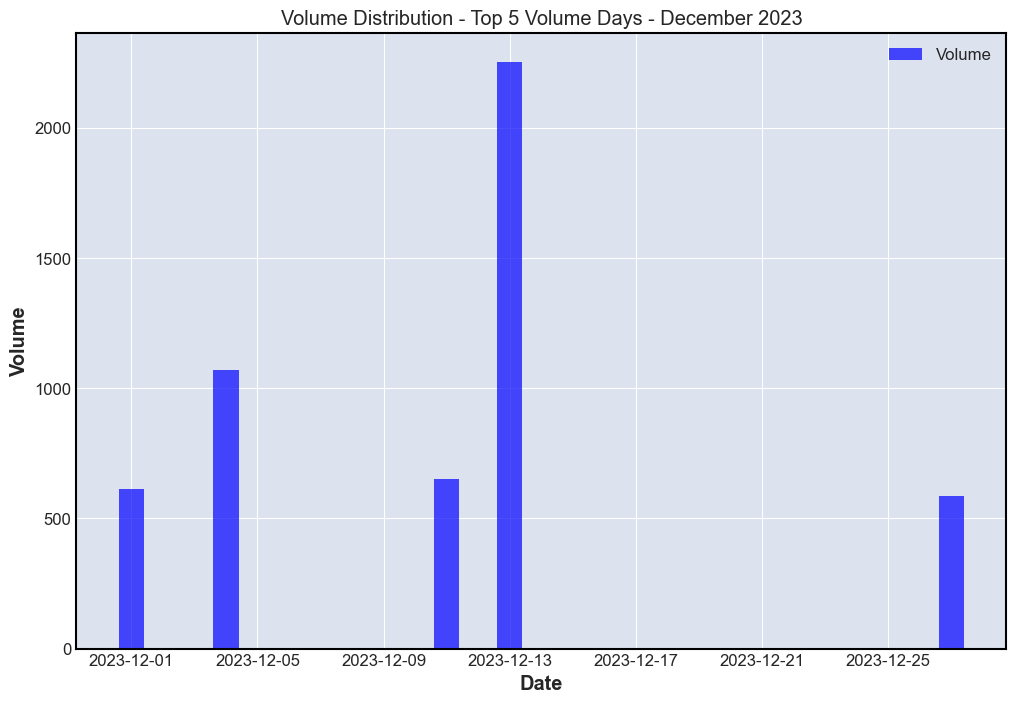

In [18]:
# Plotting the Top 5 Volume
plt.figure(figsize=(12, 8))
plt.bar(top_5_volume_dec_2023['Date'], top_5_volume_dec_2023['Volume'], color='blue', alpha=0.7)

plt.legend(['Volume'])
plt.title('Volume Distribution - Top 5 Volume Days - December 2023')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.show()

2023-12-13 - CPI report The U.S. CPI increased by 3.1% in November, and the market expects the Federal Reserve to continue to push interest rates higher on Wednesday. This report is bullish for gold, so traders will choose to enter the market at this time.


2023-12-22 - GDP report annualized growth rate is 4.9%, lower than the previous 5.2. This report is bullish for gold, so traders will choose to enter the market at this time.

The main reasons why gold rises and the US dollar falls
- Economic Uncertainty
- Inflation Hedge
- Currency Depreciation

## Model Training and Validation

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Dropout, Input
from keras.optimizers import Nadam
from sklearn.metrics import mean_absolute_percentage_error

goldDF['Daily_Return'] = goldDF['Close'].pct_change()

goldDF['Price_Up'] = (goldDF['Daily_Return'] > 0).astype(int)

features = ['Open', 'High', 'Low', 'Volume', 'Close']
target = 'Price_Up'
X = goldDF[features]
y = goldDF[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)

# Logistic Regression
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)
logreg_predictions = logreg_classifier.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

# Feature Scaling for LSTM
scaler = MinMaxScaler()
scaler.fit(goldDF.Close.values.reshape(-1,1))

test_size = 365
test_data = goldDF[-test_size:]

window_size = 60

def prepare_lstm_data(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

train_data = goldDF['Close'][:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1, 1))
X_train, y_train = prepare_lstm_data(train_data, window_size)

test_data = goldDF['Close'][-test_size - window_size:]
test_data = scaler.transform(test_data.values.reshape(-1, 1))
X_test, y_test = prepare_lstm_data(test_data, window_size)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

def define_model():
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(window_size, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='softmax'))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer=Nadam())
    model.summary()
    
    return model

model = define_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)
y_pred = model.predict(X_test)

MAPE = mean_absolute_percentage_error(y_test, y_pred)
lstm_accuracy = 1 - MAPE

print(f"Random Forest Accuracy: {rf_accuracy:.2%}")
print(f"SVM Accuracy: {svm_accuracy:.2%}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2%}")
print(f"Logistic Regression Accuracy: {logreg_accuracy:.2%}")
print(f'LSTM model Accuracy: {lstm_accuracy:.2%}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2

130/130 [==============================] - 7s 54ms/step - loss: 1.7803e-04 - val_loss: 2.9365e-04
Epoch 63/150
130/130 [==============================] - 7s 54ms/step - loss: 1.6999e-04 - val_loss: 2.3240e-04
Epoch 64/150
130/130 [==============================] - 6s 50ms/step - loss: 1.7452e-04 - val_loss: 2.8314e-04
Epoch 65/150
130/130 [==============================] - 7s 50ms/step - loss: 1.6721e-04 - val_loss: 5.7346e-04
Epoch 66/150
130/130 [==============================] - 6s 49ms/step - loss: 1.6720e-04 - val_loss: 1.9001e-04
Epoch 67/150
130/130 [==============================] - 6s 50ms/step - loss: 1.6177e-04 - val_loss: 2.4671e-04
Epoch 68/150
130/130 [==============================] - 7s 51ms/step - loss: 1.6254e-04 - val_loss: 2.2924e-04
Epoch 69/150
130/130 [==============================] - 7s 51ms/step - loss: 1.6360e-04 - val_loss: 0.0020
Epoch 70/150
130/130 [==============================] - 7s 51ms/step - loss: 1.6388e-04 - val_loss: 3.7957e-04
Epoch 71/150
130/1

130/130 [==============================] - 7s 52ms/step - loss: 1.1708e-04 - val_loss: 1.8648e-04
Epoch 136/150
130/130 [==============================] - 7s 52ms/step - loss: 1.1864e-04 - val_loss: 3.8469e-04
Epoch 137/150
130/130 [==============================] - 7s 51ms/step - loss: 1.1367e-04 - val_loss: 2.1262e-04
Epoch 138/150
130/130 [==============================] - 7s 51ms/step - loss: 1.2062e-04 - val_loss: 1.7391e-04
Epoch 139/150
130/130 [==============================] - 7s 52ms/step - loss: 1.1490e-04 - val_loss: 2.3241e-04
Epoch 140/150
130/130 [==============================] - 7s 51ms/step - loss: 1.1825e-04 - val_loss: 2.7959e-04
Epoch 141/150
130/130 [==============================] - 7s 51ms/step - loss: 1.1818e-04 - val_loss: 3.8640e-04
Epoch 142/150
130/130 [==============================] - 7s 51ms/step - loss: 1.1923e-04 - val_loss: 2.3734e-04
Epoch 143/150
130/130 [==============================] - 7s 51ms/step - loss: 1.1412e-04 - val_loss: 3.1466e-04
Epoch 

In [20]:
# Save LSTM model
model.save('gold_price_prediction_model.h5')

print("Best Model saved successfully.")

Best Model saved successfully.


In [21]:
best_model = None
best_accuracy = 0.0

if rf_accuracy > best_accuracy:
    best_accuracy = rf_accuracy
    best_model = rf_classifier

if svm_accuracy > best_accuracy:
    best_accuracy = svm_accuracy
    best_model = svm_classifier

if gb_accuracy > best_accuracy:
    best_accuracy = gb_accuracy
    best_model = gb_classifier

if logreg_accuracy > best_accuracy:
    best_accuracy = logreg_accuracy
    best_model = logreg_classifier
    
if lstm_accuracy > best_accuracy:
    best_accuracy = lstm_accuracy
    best_model = model

print(f"The best model is {type(best_model).__name__} with an accuracy of {best_accuracy:.2%}")

The best model is Sequential with an accuracy of 98.09%



Enter the date to visualize (YYYY-MM-DD): 2023-12-05
[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step
The price is expected to go Down by 0.88%
Predicted price on 2024-01-22: USD 2006.80
Predicted price after 180 days on 2024-06-04 is USD 2024.70


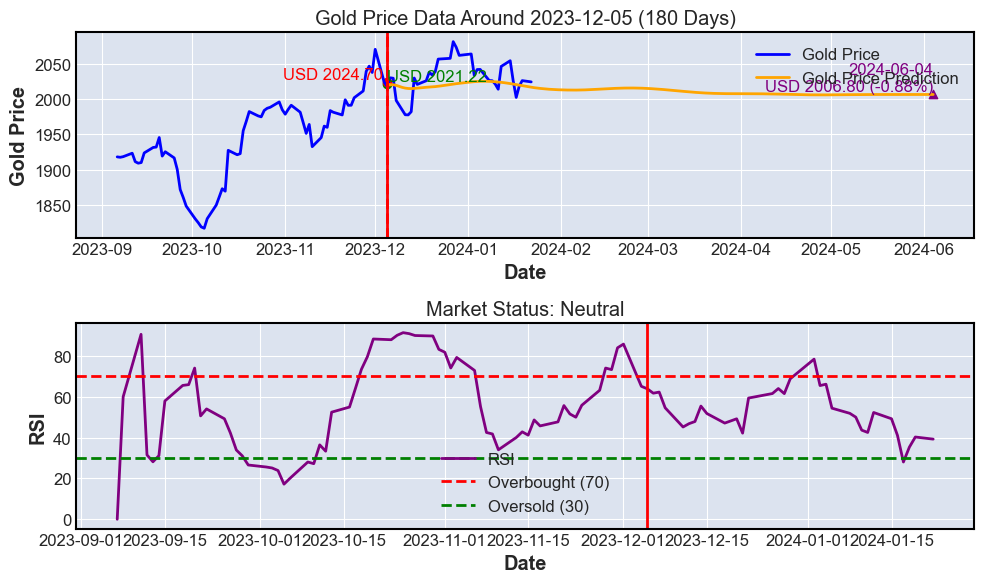

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step
The price is expected to go Down by 0.88%
Predicted price on 2024-01-22: USD 2006.80
Predicted price after 365 days on 2024-06-04 is USD 2024.60


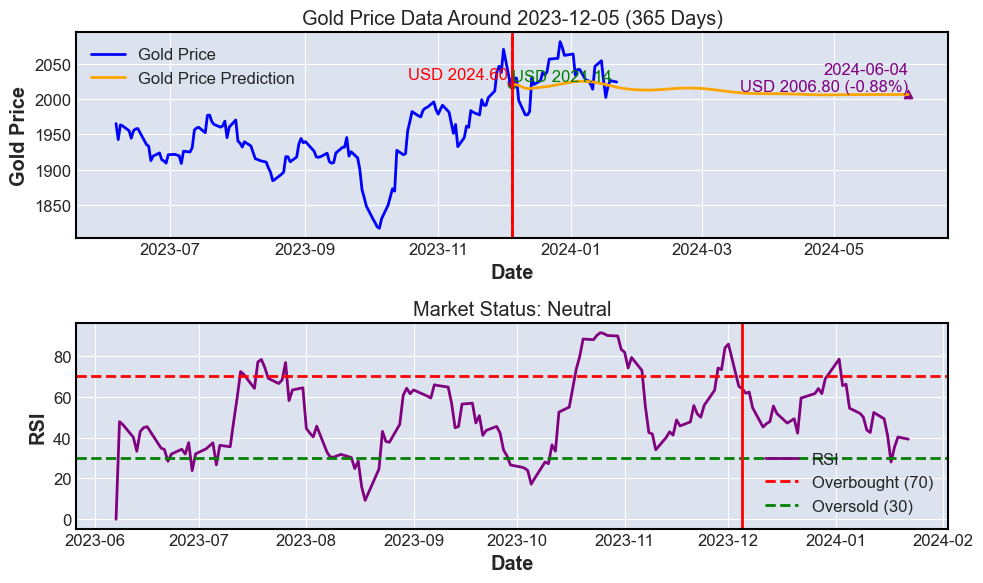

In [25]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Define the calculate_rsi function
def calculate_rsi(data, window=14):
    close_price = data['Close']
    delta = close_price.diff()

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Define the market_status function
def market_status(rsi_value):
    if rsi_value > 70:
        return 'Overbought'
    elif rsi_value < 30:
        return 'Oversold'
    else:
        return 'Neutral'


model = load_model('gold_price_prediction_model.h5')

input_date = pd.to_datetime(input("\nEnter the date to visualize (YYYY-MM-DD): "))

days_ranges = [180, 365]
days_before = max(days_ranges) // 2
days_after = days_before

window_size = 60  
for days_range in days_ranges:
    plot_start_date = input_date - pd.Timedelta(days=days_range // 2)
    plot_end_date = input_date + pd.Timedelta(days=days_range // 2)

    try:
        plot_data = yf.download('GC=F', start=plot_start_date, end=plot_end_date)

        if len(plot_data) >= window_size:
            input_data = plot_data['Close'][-window_size:].values.reshape(-1, 1)

            scaler = MinMaxScaler()
            scaler.fit(plot_data['Close'].values.reshape(-1, 1))

            def predict_gold_price(input_data):
                input_data = scaler.transform(input_data.reshape(-1, 1))
                input_data = np.reshape(input_data, (1, window_size, 1))
                predicted_price = model.predict(input_data)
                predicted_price = scaler.inverse_transform(predicted_price)
                return predicted_price[0, 0]

            predictions = []
            future_dates = [input_date + timedelta(days=i) for i in range(days_after + 1)]  # Move the creation of future_dates here
            for i in range(days_after + 1):
                predictions.append(predict_gold_price(input_data))
                input_data = np.append(input_data[1:], predictions[-1])  # Update input_data for the next prediction

            last_day_difference = ((predictions[-1] - plot_data['Close'].iloc[-1]) /
                                   plot_data['Close'].iloc[-1]) * 100

            last_day_direction = 'Up' if last_day_difference > 0 else 'Down'

            last_day_date = plot_data.index[-1]

            # Calculate close_price here
            close_price = plot_data['Close'].iloc[-1]

            print(f"The price is expected to go {last_day_direction} by {abs(last_day_difference):.2f}%")
            print(f"Predicted price on {last_day_date.strftime('%Y-%m-%d')}: USD {predictions[-1]:.2f}")
            print(f"Predicted price after {days_range} days on {future_dates[-1].strftime('%Y-%m-%d')} is USD {close_price:.2f}")

            plt.figure(figsize=(10, 6))

            plt.subplot(2, 1, 1)
            plt.plot(plot_data.index, plot_data['Close'], label='Gold Price', linestyle='-', color='blue')
            plt.plot(future_dates, predictions, color='orange', linestyle='-', label='Gold Price Prediction')
            plt.axvline(x=input_date, color='red', linestyle='--')

            plt.scatter(input_date, predictions[0], color='green')
            plt.text(input_date, predictions[0], f'USD {predictions[0]:.2f}', ha='left',
                     va='bottom', color='green')
            plt.scatter(input_date, plot_data['Close'].iloc[-1], color='red')
            plt.axvline(x=input_date, color='red', linestyle='-')
            plt.text(input_date, close_price, f'USD {close_price:.2f} ', ha='right',
                     va='bottom', color='red')

            last_day_annotation = f'{future_dates[-1].strftime("%Y-%m-%d")}\nUSD {predictions[-1]:.2f} ({last_day_difference:.2f}%)'
            plt.scatter(future_dates[-1], predictions[-1], color='purple', marker='^')
            plt.text(future_dates[-1], predictions[-1], last_day_annotation, ha='right',
                     va='bottom', color='purple')

            plt.title(f'Gold Price Data Around {input_date.strftime("%Y-%m-%d")} ({days_range} Days)')
            plt.xlabel('Date')
            plt.ylabel('Gold Price')
            plt.legend()
            plt.grid(True)

            # Plotting RSI
            plt.subplot(2, 1, 2)
            rsi_data = calculate_rsi(plot_data)
            plt.plot(plot_data.index, rsi_data, label='RSI', linestyle='-', color='purple')
            plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
            plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')

            # Add red vertical line for input date
            plt.axvline(x=input_date, color='red', linestyle='-')

            market_status_value = market_status(rsi_data.iloc[-1])
            plt.title(f'Market Status: {market_status_value}')
            plt.xlabel('Date')
            plt.ylabel('RSI')
            plt.legend()
            plt.grid(True)

            plt.tight_layout()
            plt.show()

        else:
            print(f"Insufficient historical data for scaling in the {days_range}-day plot.")

    except Exception as e:
        print(f"Failed to download data for the {days_range}-day plot: {e}")
